IOU : is a metric that messuares how similar a predicted bounding box is to the original bounding box.


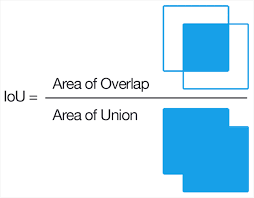

IOU > 0.5 == decent

IOU > 0.7 == good

IOU > 0.9 == perfect

In [1]:
import torch

In [7]:
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
    # box_preds has a size of (Batch_size , 4) where 4 represent (x,y,w,h in case of midpoint rep) or (x1,y1,x2,y2 in case of croners rep)
    if box_format == "midpoint":
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2

    elif box_format == "corners":
        box1_x1 = boxes_preds[..., 0:1]
        box1_y1 = boxes_preds[..., 1:2]
        box1_x2 = boxes_preds[..., 2:3]
        box1_y2 = boxes_preds[..., 3:4]
        box2_x1 = boxes_labels[..., 0:1]
        box2_y1 = boxes_labels[..., 1:2]
        box2_x2 = boxes_labels[..., 2:3]
        box2_y2 = boxes_labels[..., 3:4]

    x1 = torch.max(box1_x1, box2_x1)
    print (x1)
    y1 = torch.max(box1_y1, box2_y1)
    x2 = torch.min(box1_x2, box2_x2)
    y2 = torch.min(box1_y2, box2_y2)

    # Need clamp(0) in case they do not intersect, then we want intersection to be 0
    intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

    #devide by zero case
    return intersection / (box1_area + box2_area - intersection + 1e-6)

In [12]:
def intersection_over_union_wh(boxes1, boxes2):
    #same as the above function but instead in case of W, H 
    #will be used in DataSet class
    intersection = torch.min(boxes1[..., 0], boxes2[..., 0]) * torch.min(boxes1[..., 1], boxes2[..., 1])
    union = (boxes1[..., 0] * boxes1[..., 1] + boxes2[..., 0] * boxes2[..., 1] - intersection)
    return intersection / union

In [13]:
x = torch.tensor([[0.2800, 0.2200],
        [0.3800, 0.4800],
        [0.9000, 0.7800],
        [0.0700, 0.1500],
        [0.1500, 0.1100],
        [0.1400, 0.2900],
        [0.0200, 0.0300],
        [0.0400, 0.0700],
        [0.0800, 0.0600]])

In [14]:
y = torch.tensor([0.7180, 0.8408])

In [15]:
IOU = intersection_over_union_wh(x,y)
print (IOU)

tensor([0.1020, 0.3021, 0.7511, 0.0174, 0.0273, 0.0673, 0.0010, 0.0046, 0.0080])
